Используемые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Исходная функция:

In [2]:
def f(x):
    return 5*x**2 - 5*x - 5

Реализация метода дихотомии:

In [3]:
def bisection_method(a, b, tol):
    iters = 0
    evals = 0

    while (b - a) / 2 > tol:
        # Calculate the midpoint of the current interval
        c = (a + b) / 2

        # Evaluate the function at two points on either side of the midpoint
        # to determine which half of the interval to continue searching
        if f(c + tol / 2) < f(c - tol / 2):
            a = c
        else:
            b = c
        iters += 1
        evals += 2
        print("Iteration {}: [{}, {}]".format(iters, a, b))

    return (a + b) / 2, iters, evals

Реализация метода золотого сечения:

In [4]:
def golden_method(a, b, tol):
    iters = 0
    evals = 0

    # golden ratio
    gr = (np.sqrt(5) - 1) / 2
    # Calculate the initial two points
    x1 = b - gr * (b - a)
    x2 = a + gr * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    evals += 2

    while (b - a) / 2 > tol:
        if f1 < f2:
            # Narrow the interval by replacing the right endpoint with
            # the current left endpoint
            b = x2
            # The new right endpoint becomes the old left endpoint
            x2 = x1
            f2 = f1
            # Calculate the new left endpoint
            x1 = b - gr * (b - a)
            f1 = f(x1)  # Evaluate the function at the new value of x1
        else:
            # Narrow the interval by replacing the left endpoint with
            # the current right endpoint
            a = x1
            # The new left endpoint becomes the old right endpoint
            x1 = x2
            f1 = f2
            # Calculate the new right endpoint
            x2 = a + gr * (b - a)
            f2 = f(x2) # Evaluate the function at the new value of x2
        evals += 1
        iters += 1
        print("Iteration {}: [{}, {}]".format(iters, a, b))

    return (a + b) / 2, iters, evals

Реализация метода Фиббоначи:

In [5]:
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

def fibonacci_method(a, b, tol):
    iters = 0
    evals = 0

    # initialize Fibonacci search parameters
    n = 1
    # Determine the nth Fibonacci number such that the interval width
    # is less than the given tolerance
    while (b - a) / fibonacci(n + 1) > tol:
        n += 1

    # Set the initial endpoints of the interval
    c = a + (b - a) / fibonacci(n + 1) * fibonacci(n - 1)
    d = a + (b - a) / fibonacci(n + 1) * fibonacci(n)

    while (b - a) / 2 > tol:
        if f(c) < f(d):
            # Narrow the interval by replacing the right endpoint with
            # the current left endpoint
            b = d
            # The new right endpoint becomes the old left endpoint
            d = c
            # Move the left endpoint to the right
            n -= 1
            # Calculate the new left endpoint
            c = a + (b - a) / fibonacci(n + 1) * fibonacci(n - 1)
        else:
            # Narrow the interval by replacing the left endpoint with
            # the current right endpoint
            a = c
            # The new left endpoint becomes the old right endpoint
            c = d
            # Move the right endpoint to the left
            n -= 1
            # Calculate the new right endpoint
            d = a + (b - a) / fibonacci(n + 1) * fibonacci(n)
        evals += 2
        iters += 1
        print("Iteration {}: [{}, {}]".format(iters, a, b))

    return (a + b) / 2, iters, evals

Реализация метода парабол:

In [6]:
def parabola_method(a, b, tol):
    iters = 0
    evals = 0

    # Evaluate function at the three points x1, x2, x3
    x1 = a
    x3 = b
    x2 = (x1 + x3) / 2
    f1 = f(x1)
    f3 = f(x3)
    f2 = f(x2)
    evals += 3

    while abs(x3 - x1) > tol:
        print("Iteration {}: [{}, {}, {}]".format(iters, x1, x2, x3))

        # Compute the minimum of the parabola
        u = x2 - (((x2 - x1)**2 * (f2 - f3) - (x2 - x3)**2 * (f3 - f1)) / (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1))))
        if u < x1 or u > x3:
            # If the minimum is outside [x1,x3], bisect the interval instead
            u = (x1 + x3) / 2

        fu = f(u)
        evals += 1

        # Update the points x1, x2, x3 based on the function values
        if fu < f2:
            if u > x2:
                x1 = x2
                f1 = f2
            else:
                x3 = x2
                f3 = f2
            x2 = u
            f2 = fu
        else:
            if u > x2:
                x3 = u
                f3 = fu
            else:
                x1 = u
                f1 = fu

        iters += 1

    return x2, iters, evals

Реализация комбинированного метода Брента:

In [7]:
def brent_method(a, c, tol):
    # Initialize variables
    k = (3 - np.sqrt(5)) / 2  # constant used for parabolic interpolation
    x = w = v = (a + c) / 2  # x, w, and v are three points used for interpolation
    fx = fw = fv = f(x)  # f(x), f(w), and f(v) are the function values at the three points
    d = e = c - a  # d and e are variables used for tracking the size of the bracket
    iters = 0
    evals = 1

    while abs(x - (a + c) / 2) + (c - a) / 2 > 2 * tol:
        g, e = e, d  # save the size of the bracket before the last iteration

        print("Iteration {}: [{}, {}]".format(iters, a, c))
        # Check if we need to perform a parabolic approximation
        if x != w and x != v and w != v and fx != fw and fx != fv and fw != fv:
            u = ((w - x) ** 2 * (fx - fv) - (x - v) ** 2 * (fx - fw)) / (2 * ((w - x) * (fx - fv) - (x - v) * (fx - fw)))
            if a + tol <= u <= c - tol and abs(u - x) < g / 2:
                d = abs(u - x) # update the size of the bracket
            else:
                if x < (a + c) / 2:
                    u = x + k * (c - x)
                    d = c - x
                else:
                    u = x - k * (x - a)
                    d = x - a
            if abs(u - x) < tol:
                u = x + np.copysign(tol, u - x)  # enforce the minimum step size
            fu = f(u)
            evals += 1

            if fu <= fx:
                if u >= x:
                    a = x
                else:
                    c = x
                v, w, x = w, x, u
                fv, fw, fx = fw, fx, fu
            else:
                if u >= x:
                    c = u
                else:
                    a = u
                if fu <= fw or w == x:
                    v, w = w, u
                    fv, fw = fw, fu
                elif fu <= fv or v == x or v == w:
                    v, fv = u, fu
        else:
            if x < (a + c) / 2: # If we can't perform a parabolic approximation, use golden-section step
                u = x + k * (c - x)
                d = c - x
            else:
                u = x - k * (x - a)
                d = x - a
            if abs(u - x) < tol:
                u = x + np.copysign(tol, u - x)
            fu = f(u)
            evals += 1

            if fu <= fx:
                if u >= x:
                    a = x
                else:
                    c = x
                v, w, x = w, x, u
                fv, fw, fx = fw, fx, fu
            else:
                if u >= x:
                    c = u
                else:
                    a = u
                if fu <= fw or w == x:
                    v, w = w, u
                    fv, fw = fw, fu
                elif fu <= fv or v == x or v == w:
                    v, fv = u, fu

        iters += 1

    return x, iters, evals

Исследуемый отрезок:

In [8]:
a, b = -2, 5

Массив точностей:

In [9]:
eps = [1e-2, 1e-4, 1e-6]

Точка для проверки:

In [10]:
x_fmin = 0

Сравнение методов:

In [11]:
methods = [bisection_method, golden_method, fibonacci_method, parabola_method, brent_method]
for method in methods:
    print(method.__name__ + ":")
    for e in eps:
        x_min, iters, evals = method(a, b, e)
        x_fmin = x_min
        print("x_min = ", x_min, " eps = ", e, " n_iter = ", iters, " n_evals = ", evals)

bisection_method:
Iteration 1: [-2, 1.5]
Iteration 2: [-0.25, 1.5]
Iteration 3: [-0.25, 0.625]
Iteration 4: [0.1875, 0.625]
Iteration 5: [0.40625, 0.625]
Iteration 6: [0.40625, 0.515625]
Iteration 7: [0.4609375, 0.515625]
Iteration 8: [0.48828125, 0.515625]
Iteration 9: [0.48828125, 0.501953125]
x_min =  0.4951171875  eps =  0.01  n_iter =  9  n_evals =  18
Iteration 1: [-2, 1.5]
Iteration 2: [-0.25, 1.5]
Iteration 3: [-0.25, 0.625]
Iteration 4: [0.1875, 0.625]
Iteration 5: [0.40625, 0.625]
Iteration 6: [0.40625, 0.515625]
Iteration 7: [0.4609375, 0.515625]
Iteration 8: [0.48828125, 0.515625]
Iteration 9: [0.48828125, 0.501953125]
Iteration 10: [0.4951171875, 0.501953125]
Iteration 11: [0.49853515625, 0.501953125]
Iteration 12: [0.49853515625, 0.500244140625]
Iteration 13: [0.4993896484375, 0.500244140625]
Iteration 14: [0.49981689453125, 0.500244140625]
Iteration 15: [0.49981689453125, 0.500030517578125]
Iteration 16: [0.4999237060546875, 0.500030517578125]
x_min =  0.4999771118164062

In [12]:
y_fmin=f(x_fmin)

Построение графика:

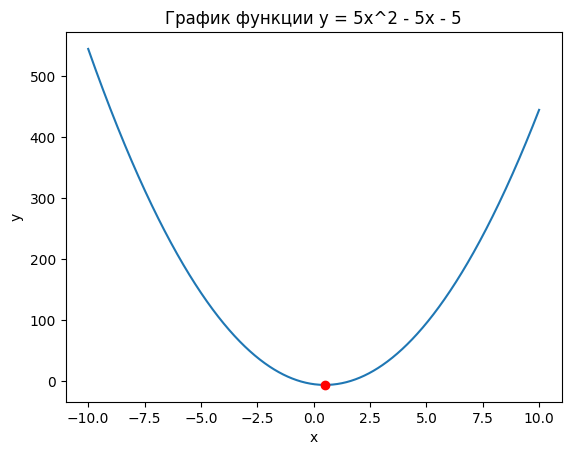

In [13]:
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.title('График функции y = 5x^2 - 5x - 5')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
y_fmin = f(x_fmin)
plt.plot(x_fmin, y_fmin, 'ro')
plt.show()